In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545

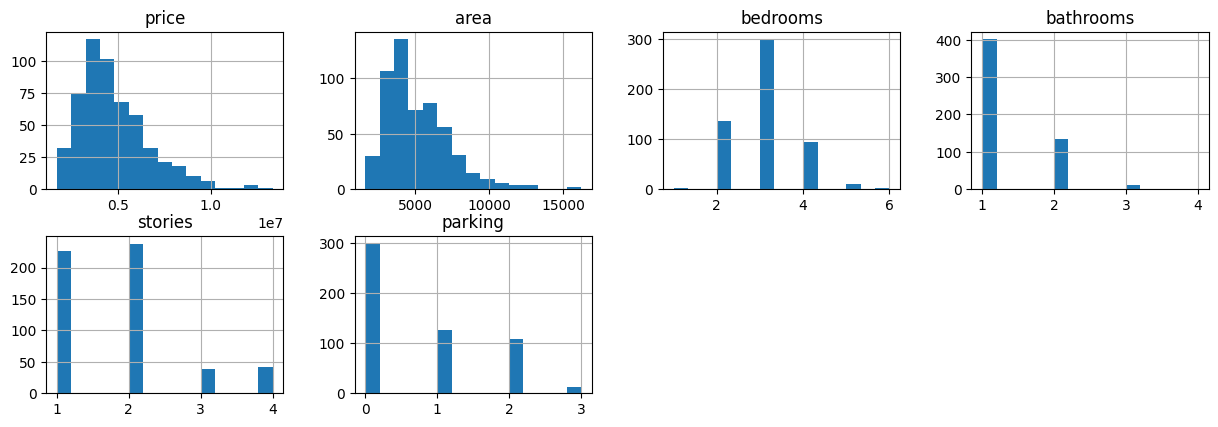

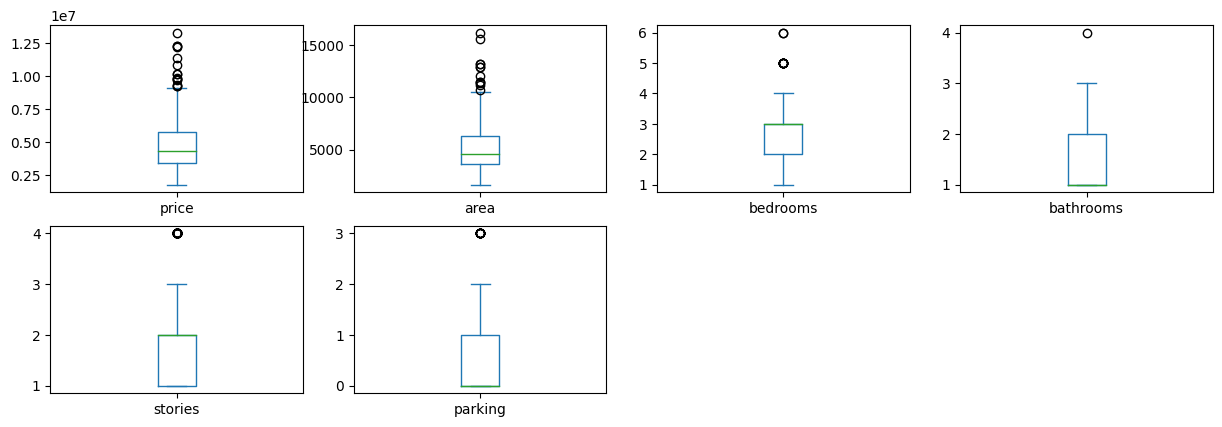

<ipython-input-3-c9e9a027912e>:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, fmt=".2f")


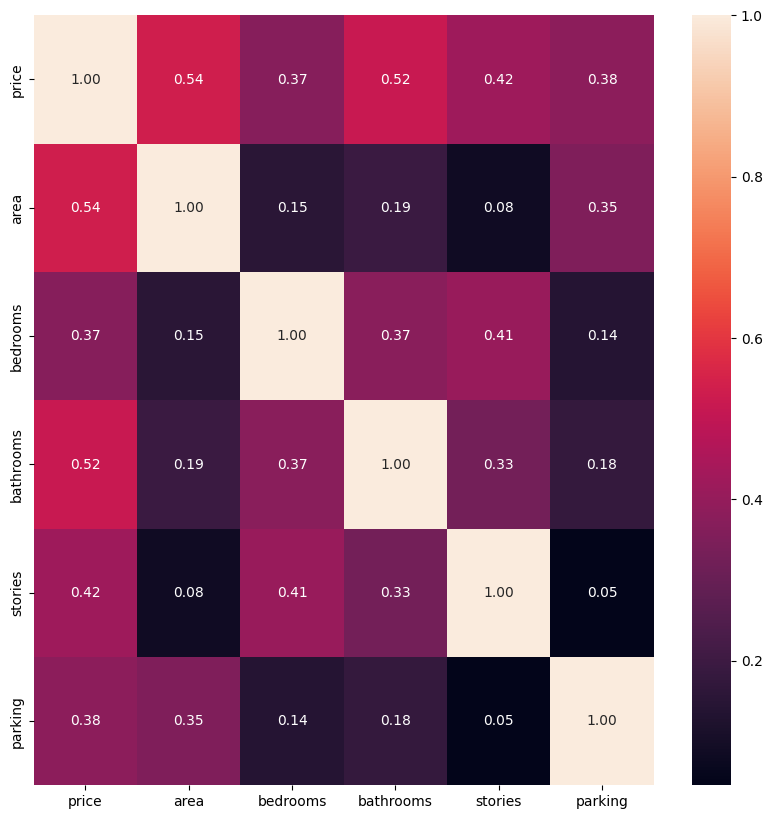

In [3]:
# Load the dataset
data = pd.read_csv('/content/gdrive/MyDrive/CMPE-255/Assignment 7/Housing.csv')

# Display the first few rows of the dataset
print(data.head())

# Basic statistics of the dataset
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualizations for data exploration
# Histograms for numerical features
data.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.show()

# Boxplots for numerical features
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(15,10))
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()


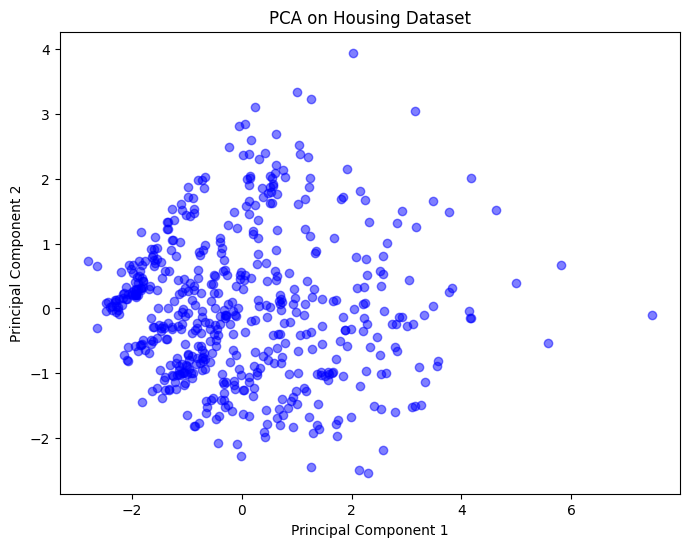

Explained Variance Ratio: [0.42601752 0.20285811]


In [4]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Since PCA is affected by scale, it is important to scale the features in your data before applying PCA
scaler = StandardScaler()

# Fit on data and transform
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))

# Assuming you want to keep 2 principal components
pca = PCA(n_components=2)
pca.fit(scaled_data)

# Transform the data
pca_data = pca.transform(scaled_data)

# Visualizing the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue', marker='o', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Housing Dataset')
plt.show()

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


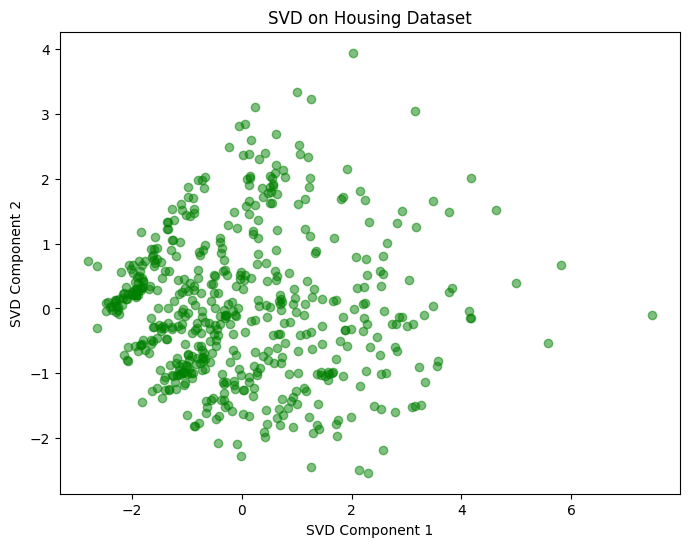

Explained Variance Ratio: [0.42601752 0.20285811]


In [5]:
# Import necessary libraries
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

# Choosing the number of components for SVD
n_components = 2
svd = TruncatedSVD(n_components=n_components)

# Applying SVD to the scaled data
svd_data = svd.fit_transform(scaled_data)

# Visualizing the SVD results
plt.figure(figsize=(8, 6))
plt.scatter(svd_data[:, 0], svd_data[:, 1], c='green', marker='o', alpha=0.5)
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('SVD on Housing Dataset')
plt.show()

# Explained variance ratio
print("Explained Variance Ratio:", svd.explained_variance_ratio_)


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


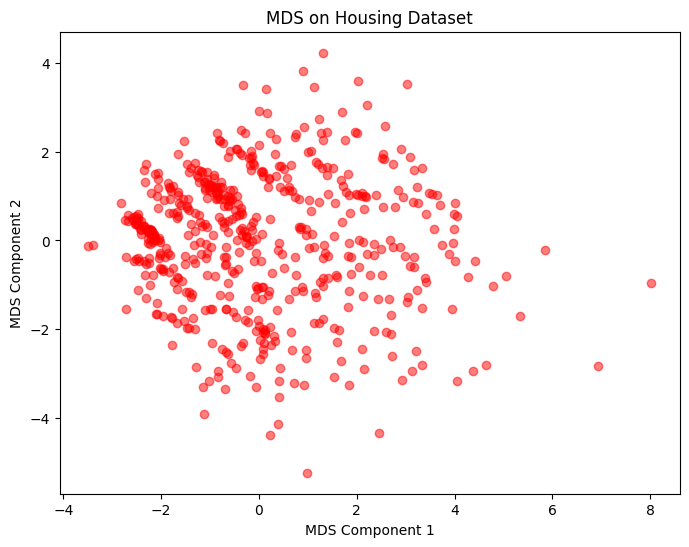

In [6]:
# Import necessary libraries
from sklearn.manifold import MDS

# Creating an MDS model
mds = MDS(n_components=2, random_state=42)

# Fitting the model and transforming the data
mds_data = mds.fit_transform(scaled_data)

# Visualizing the MDS results
plt.figure(figsize=(8, 6))
plt.scatter(mds_data[:, 0], mds_data[:, 1], c='red', marker='o', alpha=0.5)
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('MDS on Housing Dataset')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


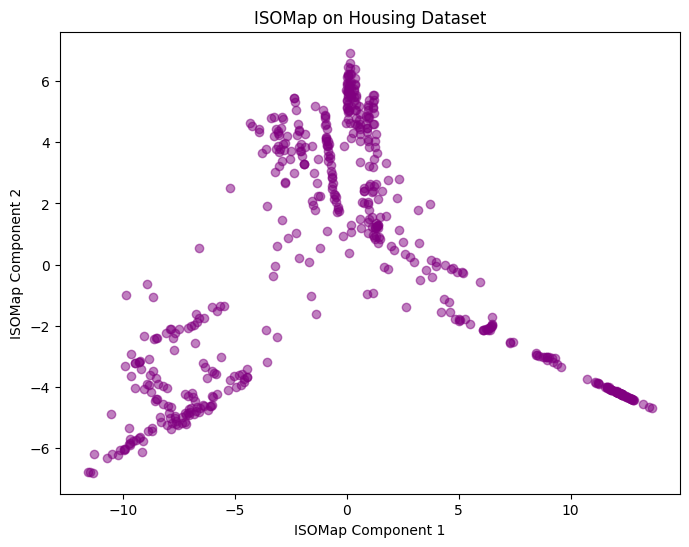

In [7]:
# Import necessary libraries
from sklearn.manifold import Isomap

# Creating an ISOMap model
isomap = Isomap(n_components=2)

# Fitting the model and transforming the data
isomap_data = isomap.fit_transform(scaled_data)

# Visualizing the ISOMap results
plt.figure(figsize=(8, 6))
plt.scatter(isomap_data[:, 0], isomap_data[:, 1], c='purple', marker='o', alpha=0.5)
plt.xlabel('ISOMap Component 1')
plt.ylabel('ISOMap Component 2')
plt.title('ISOMap on Housing Dataset')
plt.show()


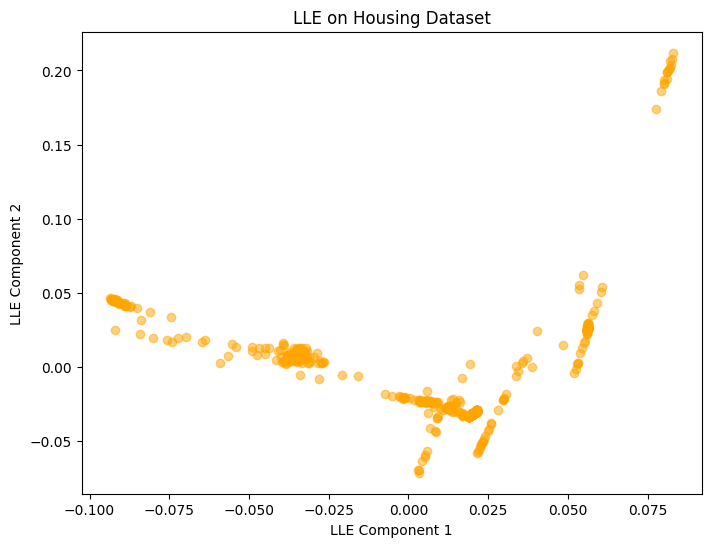

In [8]:
# Import necessary libraries
from sklearn.manifold import LocallyLinearEmbedding

# Creating an LLE model
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)

# Fitting the model and transforming the data
lle_data = lle.fit_transform(scaled_data)

# Visualizing the LLE results
plt.figure(figsize=(8, 6))
plt.scatter(lle_data[:, 0], lle_data[:, 1], c='orange', marker='o', alpha=0.5)
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.title('LLE on Housing Dataset')
plt.show()


In [9]:
pip install umap

In [10]:
!pip install umap-learn

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


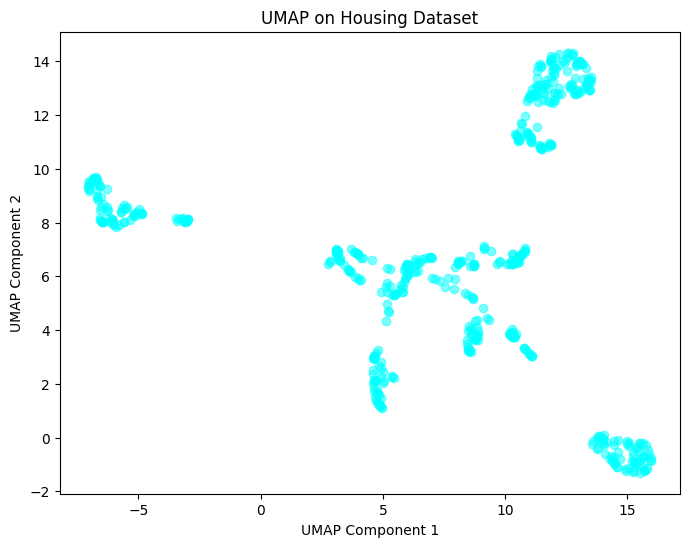

In [11]:
# Import necessary libraries
import umap
import matplotlib.pyplot as plt

# Creating a UMAP model
umap_model = umap.UMAP(n_components=2, random_state=42)

# Fitting the model and transforming the data
umap_data = umap_model.fit_transform(scaled_data)

# Visualizing the UMAP results
plt.figure(figsize=(8, 6))
plt.scatter(umap_data[:, 0], umap_data[:, 1], c='cyan', marker='o', alpha=0.5)
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP on Housing Dataset')
plt.show()


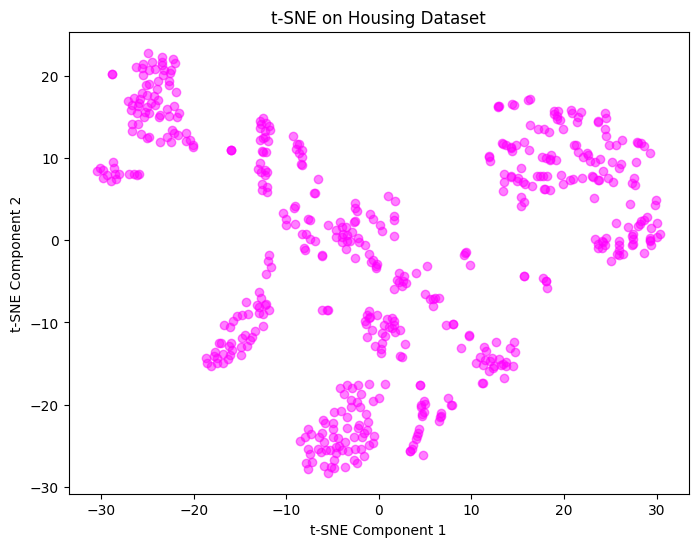

In [12]:
# Import necessary libraries
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Creating a t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fitting the model and transforming the data
tsne_data = tsne.fit_transform(scaled_data)

# Visualizing the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c='magenta', marker='o', alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE on Housing Dataset')
plt.show()


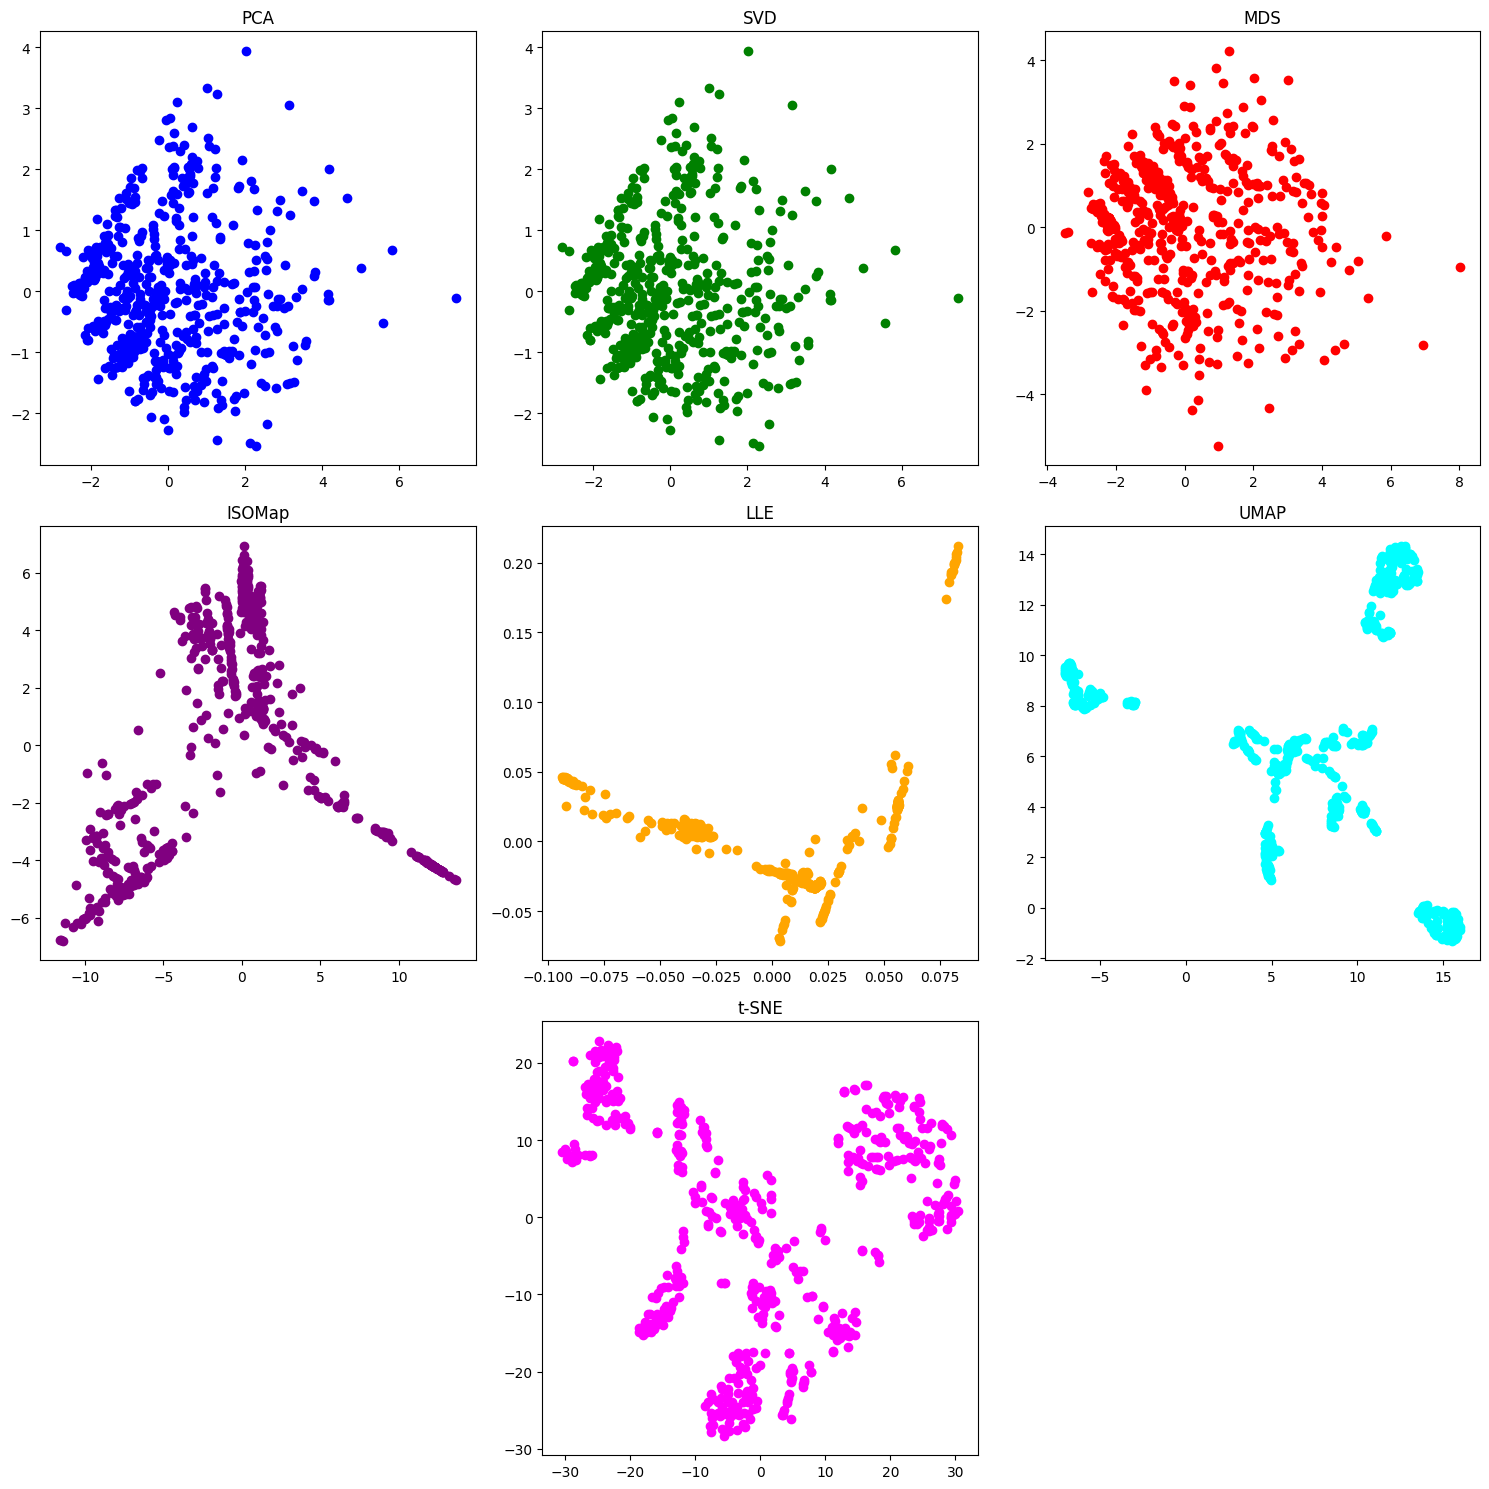

In [15]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# PCA
axs[0, 0].scatter(pca_data[:, 0], pca_data[:, 1], c='blue')
axs[0, 0].set_title('PCA')

# SVD
axs[0, 1].scatter(svd_data[:, 0], svd_data[:, 1], c='green')
axs[0, 1].set_title('SVD')

# MDS
axs[0, 2].scatter(mds_data[:, 0], mds_data[:, 1], c='red')
axs[0, 2].set_title('MDS')

# ISOMap
axs[1, 0].scatter(isomap_data[:, 0], isomap_data[:, 1], c='purple')
axs[1, 0].set_title('ISOMap')

# LLE
axs[1, 1].scatter(lle_data[:, 0], lle_data[:, 1], c='orange')
axs[1, 1].set_title('LLE')

# UMAP
axs[1, 2].scatter(umap_data[:, 0], umap_data[:, 1], c='cyan')
axs[1, 2].set_title('UMAP')

# t-SNE
axs[2, 1].scatter(tsne_data[:, 0], tsne_data[:, 1], c='magenta')
axs[2, 1].set_title('t-SNE')

# Hide unused subplots
axs[2, 0].axis('off')
axs[2, 2].axis('off')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


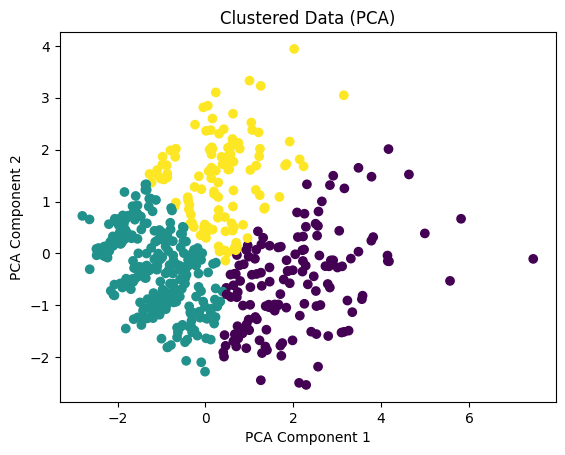

In [13]:
from sklearn.cluster import KMeans

# Example with PCA reduced data
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(pca_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.title('Clustered Data (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


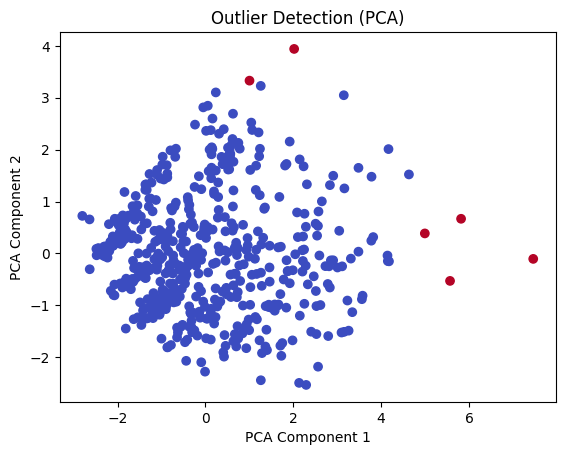

In [14]:
from scipy import stats
import numpy as np

# Example with PCA data
z_scores = np.abs(stats.zscore(pca_data))
outliers = (z_scores > 3).any(axis=1)  # Adjust threshold as needed

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=outliers, cmap='coolwarm')
plt.title('Outlier Detection (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
